In [1]:
!pip install matplotlib==3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import pylab
from sklearn import preprocessing
import plotly.express as px
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Data Glacier internship/week2')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cab_data = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
customer_id = pd.read_csv('Customer_ID.csv')
transaction_id = pd.read_csv('Transaction_ID.csv')

## Investigating the data

In [5]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [6]:
print('Shape: ', cab_data.shape)
print()
print('null value: ')
print(cab_data.isna().sum())
print()
print('data types: ')
print(cab_data.dtypes)

Shape:  (359392, 7)

null value: 
Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

data types: 
Transaction ID      int64
Date of Travel     object
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object


In [7]:
#separate date in month and year
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'])
cab_data['Month'] = cab_data['Date of Travel'].dt.month
cab_data['Year'] = cab_data['Date of Travel'].dt.year

In [8]:
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [9]:
print('Shape: ', city.shape)
print()
print('null value: ')
print(city.isna().sum())
print()
print('data types: ')
print(city.dtypes)

Shape:  (20, 3)

null value: 
City          0
Population    0
Users         0
dtype: int64

data types: 
City          object
Population    object
Users         object
dtype: object


In [10]:
city['Population'] = city['Population'].str.replace(',', '').astype(int)
city['Users'] = city['Users'].str.replace(',', '').astype(int)

In [11]:
print('data types: ')
print(city.dtypes)

data types: 
City          object
Population     int64
Users          int64
dtype: object


In [12]:
city.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [13]:
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [14]:
print('Shape: ', customer_id.shape)
print()
print('null value: ')
print(customer_id.isna().sum())
print()
print('data types: ')
print(customer_id.dtypes)

Shape:  (49171, 4)

null value: 
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

data types: 
Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object


In [15]:
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [16]:
print('Shape: ', transaction_id.shape)
print()
print('null value: ')
print(transaction_id.isna().sum())
print()
print('data types: ')
print(transaction_id.dtypes)

Shape:  (440098, 3)

null value: 
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

data types: 
Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object


In [17]:
def change_names(table):
    for column in table.columns:
        if ' ' in column:
            table = table.rename(columns={column:column.replace(' ','_')})
    return table

In [18]:
cab_data = change_names(cab_data)
transaction_id = change_names(transaction_id)
city = change_names(city)
customer_id = change_names(customer_id)

In [19]:
holidays = pd.read_csv('US_Holiday_Dates.csv')
holidays.head(2)

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005


In [20]:
holidays.shape

(342, 6)

In [21]:
holidays.dtypes

Date       object
Holiday    object
WeekDay    object
Month       int64
Day         int64
Year        int64
dtype: object

In [22]:
holidays['Date'] = pd.to_datetime(holidays['Date'])

In [23]:
holidays = holidays.where((holidays['Date'] >= '2016-01-01') & (holidays['Date'] <= '2018-12-31')).dropna()

## Create MasterData

In [24]:
len(transaction_id['Transaction_ID'].unique()), len(cab_data['Transaction_ID'].unique())

(440098, 359392)

In table transaktion_id we can see that number unique value much bigger than in table cab_data. That is mean that we have no informations about price, city and km, company for 80 706 transaktions. These transactions won't be able to help in analysis. 

In [25]:
transactions = cab_data.merge(transaction_id, on= 'Transaction_ID').merge(customer_id, on ='Customer_ID').merge(city, on = 'City')
transactions.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,8,2016,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,7,2018,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,11,2018,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,6,2016,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,4,2018,27703,Card,Male,27,9237,814885,24701


In [26]:
len(transactions['Customer_ID'].unique()), len(transaction_id['Customer_ID'].unique())

(46148, 49171)

In [27]:
unknown_customers = list(set(transaction_id['Customer_ID'].unique()) ^ set(transactions['Customer_ID'].unique())) # how many are there unknown clients

In [28]:
transaction_id.where(transaction_id["Customer_ID"].isin(unknown_customers)).dropna().shape #how many transactions have unknown users

(80207, 3)

we can see that with 80207 transactions we can't find any informations about cities, taxi companies and of course prices. Only for 499 transactions we can find informations about cities, and taxi companies. But This operation add only 0.1% data.  

add holidays in masterdata

In [29]:
holidays_date = list(holidays.Date)
transactions['Holiday'] = transactions.apply(lambda x: 1 if x.Date_of_Travel in holidays_date else 0, axis=1)

In [30]:
transactions['Transaction_ID'].groupby(transactions['Holiday']).nunique()

Holiday
0    339597
1     19795
Name: Transaction_ID, dtype: int64

## Analysis

### Yellow cab

In [31]:
yellow_cab = transactions.where(transactions['Company'] == 'Yellow Cab').dropna()

In [32]:
# describe data
int_columns = ['KM_Travelled', 'Price_Charged', 'Cost_of_Trip', 'Age', 'Income_(USD/Month)']
yellow_cab[int_columns].describe()

,KM_Travelled,Price_Charged,Cost_of_Trip,Age,Income_(USD/Month)
count,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000
mean,22.569517,458.181990,297.922004,35.341112,15045.669817
std,12.234298,288.386166,162.548986,12.578625,7962.727062
min,1.900000,20.730000,22.800000,18.000000,2000.000000
25%,11.990000,226.680000,158.400000,25.000000,8439.000000
50%,22.440000,425.060000,295.596000,33.000000,14676.000000
75%,32.960000,633.880000,432.432000,42.000000,21023.000000
max,48.000000,2048.030000,691.200000,65.000000,34996.000000


## Find outliers

There are many options to find outliers. I would like to compare several methods

In [33]:
def box_plots(column):
    _, bp = column.plot.box(return_type='both')
    return _, bp

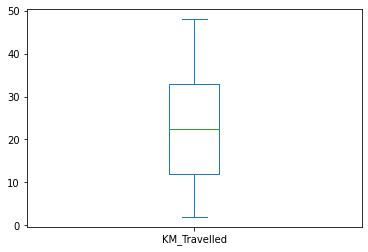

In [34]:
_, bp_km = box_plots(yellow_cab.KM_Travelled)

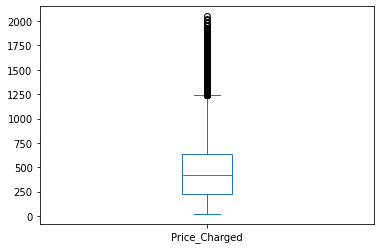

In [35]:
_, bp_price = box_plots(yellow_cab.Price_Charged)

In [36]:
outliers_price = [flier.get_ydata() for flier in bp_price["fliers"]][0]
print('Number outliers with box plot: ', yellow_cab[yellow_cab.Price_Charged.isin(outliers_price)].shape[0])

Number outliers with box plot:  3240


In [37]:
lower_bound = yellow_cab.Price_Charged.quantile(q=0.025)
upper_bound = yellow_cab.Price_Charged.quantile(q=0.975)
print('Number outliers with quantile: ', yellow_cab[(yellow_cab.Price_Charged < lower_bound) | (yellow_cab.Price_Charged > upper_bound)].shape[0])

Number outliers with quantile:  13732


In [38]:
def hampel(vals_orig):
    vals = vals_orig.copy()    
    difference = np.abs(vals.median()-vals)
    median_abs_deviation = difference.median()
    threshold = 3 * median_abs_deviation
    outlier_idx = difference > threshold
    vals[outlier_idx] = np.nan
    return(vals)

In [39]:
hempel_outliers_price = yellow_cab.shape[0] - hampel(yellow_cab.Price_Charged).dropna().count()
print("Number outliers with Hampel's filter: ", hempel_outliers_price)

Number outliers with Hampel's filter:  11392


Box plots outliers gives the best result. Let check one hypothesis - are outliers possible due to hilidays?

In [40]:
yellow_cab[yellow_cab.Price_Charged.isin(outliers_price)].groupby(yellow_cab['Holiday']).count() #doesn't matter

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Holiday
Holiday,,,,,,,,,,,,,,,,,
0.0,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029
1.0,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211


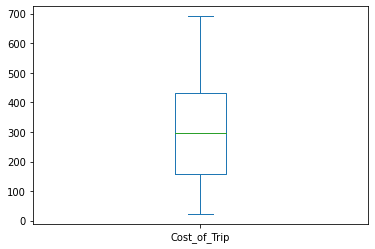

In [41]:
_, bp_cost = box_plots(yellow_cab.Cost_of_Trip) #no outliers

### Pink Cab

In [42]:
pink_cab = transactions.where(transactions['Company'] == 'Pink Cab').dropna()

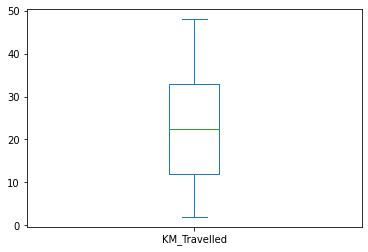

In [43]:
_, bp_km = box_plots(pink_cab.KM_Travelled)

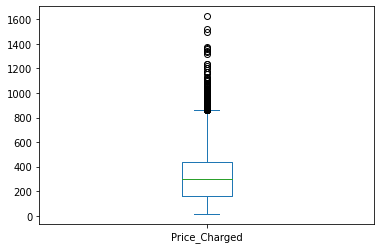

In [44]:
_, bp_price = box_plots(pink_cab.Price_Charged)


In [45]:
outliers_price = [flier.get_ydata() for flier in bp_price["fliers"]][0]
print('Number outliers with box plot: ', pink_cab[pink_cab.Price_Charged.isin(outliers_price)].shape[0])

Number outliers with box plot:  237


In [46]:
pink_cab[pink_cab.Price_Charged.isin(outliers_price)].groupby(pink_cab['Holiday']).count() #doesn't matter

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Holiday
Holiday,,,,,,,,,,,,,,,,,
0.0,215,215,215,215,215,215,215,215,215,215,215,215,215,215,215,215,215
1.0,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22


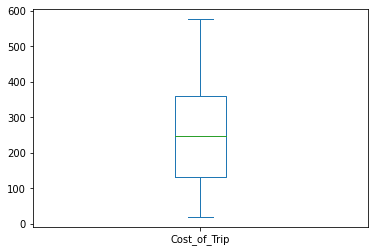

In [47]:
_, bp_cost = box_plots(pink_cab.Cost_of_Trip) 


**We don't have information about travel times and we don't understand the nature of emissions, so I won't delete them**

### Holiday analysis

In [48]:
print('mean trips in a non holiday day:')
print('Pink cab')
pink_cab_non_holid_trips = pink_cab[pink_cab.Holiday == 0]['Transaction_ID'].groupby(pink_cab.Date_of_Travel).count()
print(pink_cab_non_holid_trips.sum()/pink_cab_non_holid_trips.shape[0])
print('Yellow cab')
yel_cab_non_holid_trips = yellow_cab[yellow_cab.Holiday == 0]['Transaction_ID'].groupby(yellow_cab.Date_of_Travel).count()
print(yel_cab_non_holid_trips.sum()/yel_cab_non_holid_trips.shape[0])

mean trips in a non holiday day:
Pink cab
77.15961538461538
Yellow cab
249.37596153846152


In [49]:
print('mean trips in a holiday day:')
print('Pink cab')
pink_cab_holid_trips = pink_cab[pink_cab.Holiday == 1]['Transaction_ID'].groupby(pink_cab.Date_of_Travel).count()
print(pink_cab_holid_trips.sum()/pink_cab_holid_trips.shape[0])
print('Yellow cab')
yel_cab_holid_trips = yellow_cab[yellow_cab.Holiday == 1]['Transaction_ID'].groupby(yellow_cab.Date_of_Travel).count()
print(yel_cab_holid_trips.sum()/yel_cab_holid_trips.shape[0])

mean trips in a holiday day:
Pink cab
81.18181818181819
Yellow cab
278.72727272727275


we can see that mean of trips in holiday bigger than in an ordinary day on 5% for Pink cab and on 11% for Yellow cab

### Clients & Trips analysis

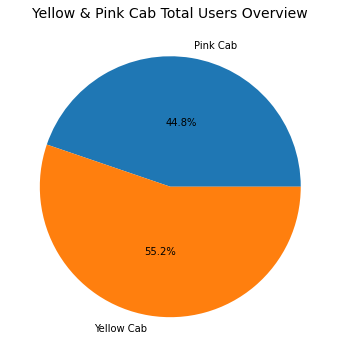

In [50]:
#total clients diagram

clients_num = transactions['Customer_ID'].groupby(transactions.Company).nunique()

pie, ax = plt.subplots(figsize=[10,6])
labels = clients_num.keys()
plt.pie(x=clients_num, autopct="%.1f%%", labels=list(labels), pctdistance=0.5)
plt.title("Yellow & Pink Cab Total Users Overview", fontsize=14)
pie.savefig("Total_users.png")

Yellow and Pink Cab firms have different in number of clients about 10%

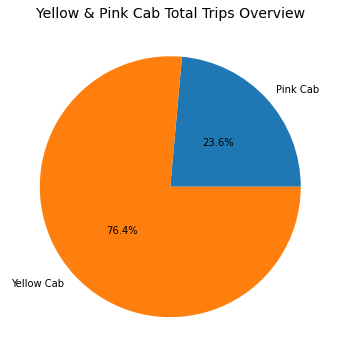

In [51]:
#total trips diagram

trips_num = transactions['Transaction_ID'].groupby(transactions.Company).nunique()

pie, ax = plt.subplots(figsize=[10,6])
labels = trips_num.keys()
plt.pie(x=trips_num, autopct="%.1f%%", labels=list(labels), pctdistance=0.5)
plt.title("Yellow & Pink Cab Total Trips Overview", fontsize=14)
pie.savefig("Total_trips.png")

Yellow Cab firm has number of trips in 3 times bigger than Pink Cab

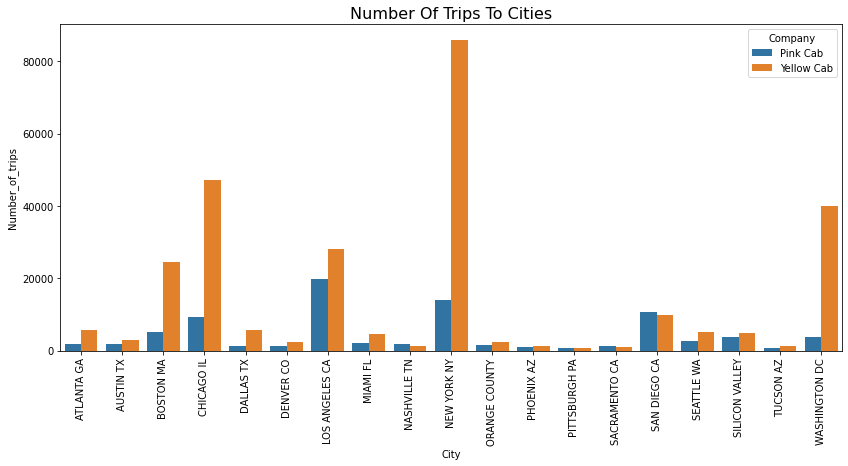

In [52]:
#Number Of Trips To Cities

cities_distr_trips = transactions.groupby(['City', 'Company'])['Transaction_ID'].count().reset_index()
cities_distr_trips.rename(columns={"Transaction_ID": "Number_of_trips"}, inplace=True)

dims = (14, 6)
fig, ax = plt.subplots(figsize= dims)

g = sns.barplot(x="City", y="Number_of_trips", hue="Company", ax=ax, data=cities_distr_trips);
var = g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Number Of Trips To Cities', fontsize=16)
plt.show()

Yellow Cab has a more trips in most cities

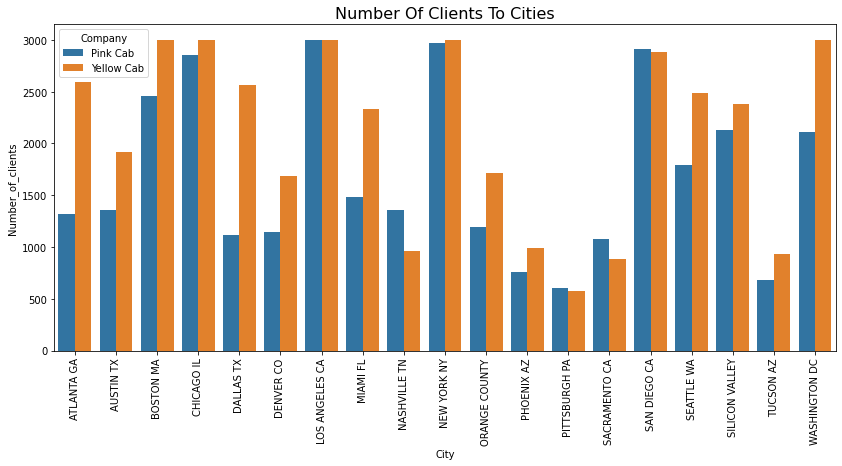

In [53]:
#Number Of Clients To Cities

cities_distr_users = transactions.groupby(['City', 'Company'])['Customer_ID'].nunique().reset_index()
cities_distr_users.rename(columns={"Customer_ID": "Number_of_clients"}, inplace=True)

dims = (14, 6)
fig, ax = plt.subplots(figsize= dims)

g = sns.barplot(x="City", y="Number_of_clients", hue="Company", ax=ax, data=cities_distr_users, estimator= np.sum);
var = g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Number Of Clients To Cities', fontsize=16)
plt.show()

Number of clients by cities totally different than number of trips. In Los Angeles both companies have almost the same namber of clients, but trips Yellow Cab has a more. Pink Cab has a advantage only in 4 cities: Pittsburg, Sacramento, Nashville, San Diego. But differens not to big

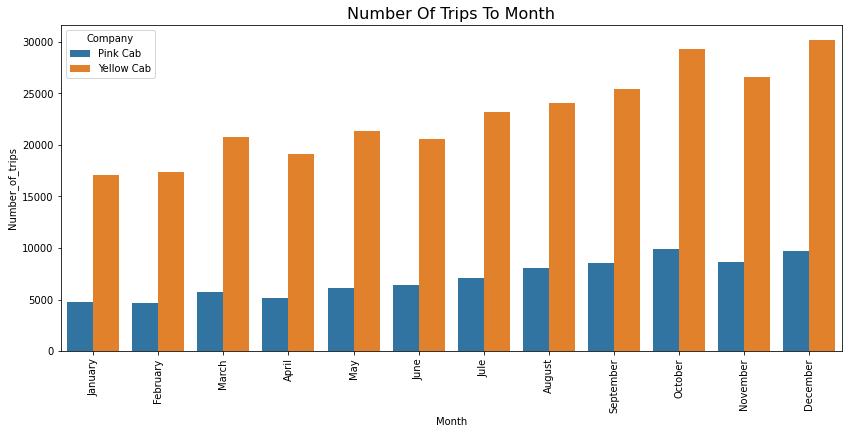

In [54]:
#Travel frequency

# month = cab.groupby(['Month']).Transaction_ID.count()
# year = cab.groupby(['Year']).Transaction_ID.count()

month_distr_trips = transactions.groupby(['Month', 'Company'])['Transaction_ID'].nunique().reset_index()
month_distr_trips.rename(columns={"Transaction_ID": "Number_of_trips"}, inplace=True)
map = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'Jule', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
month_distr_trips['Month'] = month_distr_trips.Month.map(map)

dims = (14, 6)
fig, ax = plt.subplots(figsize= dims)

g = sns.barplot(x="Month", y="Number_of_trips", hue="Company", ax=ax, data=month_distr_trips, estimator= np.sum);
var = g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Number Of Trips To Month', fontsize=16)
plt.show()

The most intensive month for both companies are October and December. The most calm are January and February

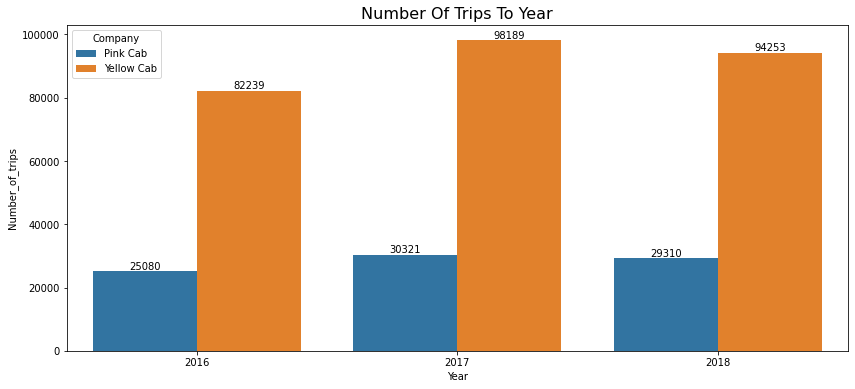

In [55]:
#Travel frequency

# month = cab.groupby(['Month']).Transaction_ID.count()
# year = cab.groupby(['Year']).Transaction_ID.count()

year_distr_trips = transactions.groupby(['Year', 'Company'])['Transaction_ID'].nunique().reset_index()
year_distr_trips.rename(columns={"Transaction_ID": "Number_of_trips"}, inplace=True)

dims = (14, 6)
fig, ax = plt.subplots(figsize= dims)

g = sns.barplot(x="Year", y="Number_of_trips", hue="Company", ax=ax, data=year_distr_trips, estimator= np.sum)
for i in g.containers:
    g.bar_label(i,)
plt.title('Number Of Trips To Year', fontsize=16)
plt.show()

in 2018 both companies has a fewer trips than in 2017

### KM_Travelled	& Price_Charged	& Cost_of_Trip & Profit Analysis

In [56]:
pink_cab.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'Month', 'Year', 'Customer_ID',
       'Payment_Mode', 'Gender', 'Age', 'Income_(USD/Month)', 'Population',
       'Users', 'Holiday'],
      dtype='object')

In [57]:
transactions['Profit'] = transactions['Price_Charged'] - transactions['Cost_of_Trip']
transactions['Profit_per_KM'] = transactions['Profit'] / transactions['KM_Travelled']

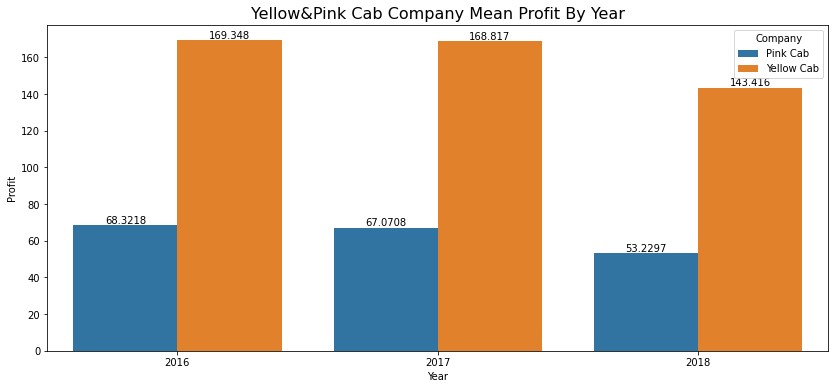

In [58]:
profit_distr = transactions.groupby(['Year', 'Company'])['Profit'].mean().reset_index()
# profit_distr.rename(columns={"Transaction_ID": "Number_of_trips"}, inplace=True)

dims = (14, 6)
fig, ax = plt.subplots(figsize= dims)

g = sns.barplot(x="Year", y="Profit", hue="Company", ax=ax, data=profit_distr)
for i in g.containers:
    g.bar_label(i,)
plt.title('Yellow&Pink Cab Company Mean Profit By Year', fontsize=16)
plt.show()

Yellow Cab has higer profit than Pink Yellow Cab. in 2018 profit is less for both company

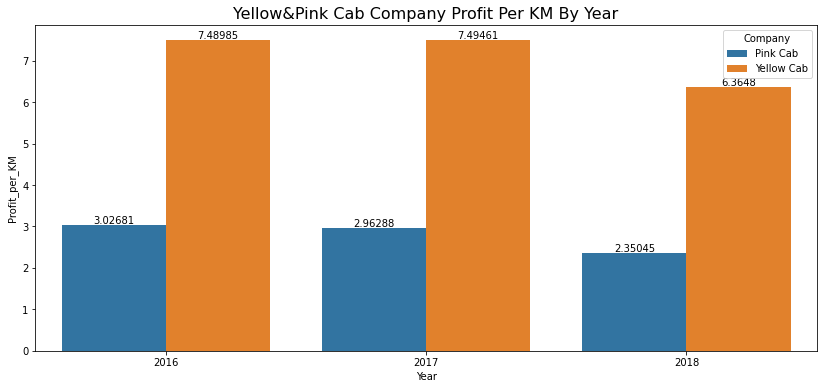

In [59]:
profit_km_distr = transactions.groupby(['Year', 'Company'])['Profit_per_KM'].mean().reset_index()
# profit_distr.rename(columns={"Transaction_ID": "Number_of_trips"}, inplace=True)

dims = (14, 6)
fig, ax = plt.subplots(figsize= dims)

g = sns.barplot(x="Year", y="Profit_per_KM", hue="Company", ax=ax, data=profit_km_distr)
for i in g.containers:
    g.bar_label(i,)
plt.title('Yellow&Pink Cab Company Profit Per KM By Year', fontsize=16)
plt.show()

We can see that profit doesn't depend of KM

Let's see how often companies work at a loss

In [60]:
transactions['Work_at_loss'] = transactions.Profit.apply(lambda x: 'Work at a loss' if x < 0 else 'Work with a profit')

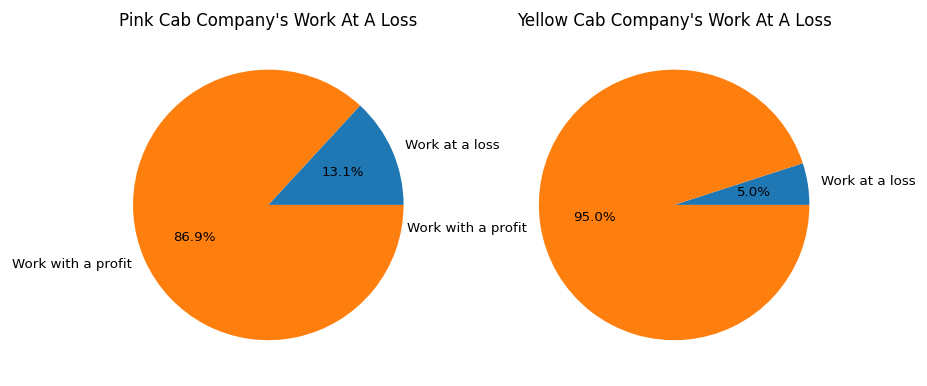

In [61]:
#work at a loss

loss_work_count_p = transactions[transactions.Company=='Pink Cab'].groupby('Work_at_loss')['Transaction_ID'].count()
loss_work_count_y = transactions[transactions.Company=='Yellow Cab'].groupby('Work_at_loss')['Transaction_ID'].count()

fig = plt.figure(figsize=(8,4),dpi=120)


ax1 = fig.add_subplot(121)
labels1 = loss_work_count_p.keys()
textprops = {"fontsize":8}
ax1.pie(x=loss_work_count_p, autopct="%.1f%%", labels=list(labels1), textprops=textprops)

plt.title("Pink Cab Company's Work At A Loss", fontsize=10)
# pie.savefig("Total_trips.png")


ax2 = fig.add_subplot(122)
labels2 = loss_work_count_y.keys()
ax2.pie(x=loss_work_count_y, autopct="%.1f%%", labels=list(labels2), textprops=textprops)
plt.title("Yellow Cab Company's Work At A Loss", fontsize=10)
# pie.savefig("Total_trips.png")
plt.show()


**Pink Cab** Company ofter work at a loss.

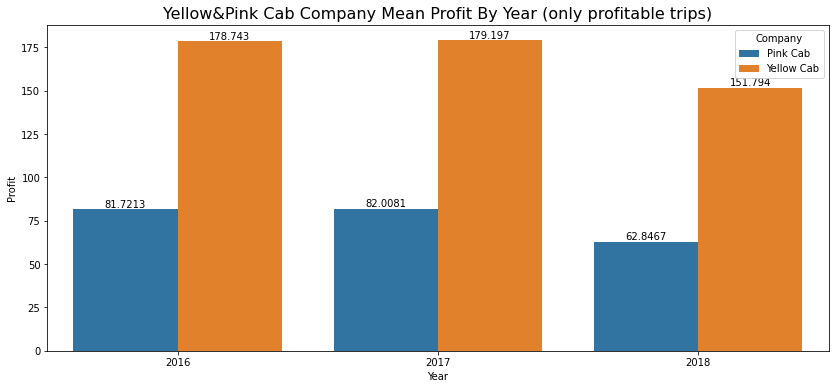

In [62]:
only_profit_distr = transactions[transactions.Work_at_loss=='Work with a profit'].groupby(['Year', 'Company'])['Profit'].mean().reset_index()
# profit_distr.rename(columns={"Transaction_ID": "Number_of_trips"}, inplace=True)

dims = (14, 6)
fig, ax = plt.subplots(figsize= dims)

g = sns.barplot(x="Year", y="Profit", hue="Company", ax=ax, data=only_profit_distr)
for i in g.containers:
    g.bar_label(i,)
plt.title('Yellow&Pink Cab Company Mean Profit By Year (only profitable trips)', fontsize=16)
plt.show()

working at a loss does not greatly affect the difference in the average size of the profit

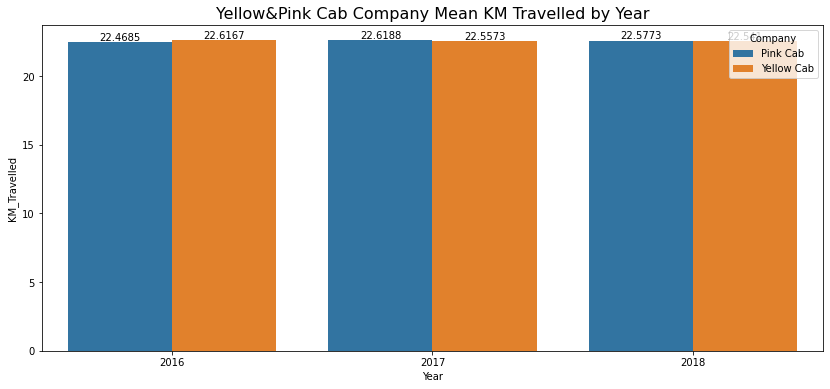

In [63]:
km_distr = transactions.groupby(['Year', 'Company'])['KM_Travelled'].mean().reset_index()
# profit_distr.rename(columns={"Transaction_ID": "Number_of_trips"}, inplace=True)

dims = (14, 6)
fig, ax = plt.subplots(figsize= dims)

g = sns.barplot(x="Year", y="KM_Travelled", hue="Company", ax=ax, data=km_distr)
for i in g.containers:
    g.bar_label(i,)
plt.title('Yellow&Pink Cab Company Mean KM Travelled by Year', fontsize=16)
plt.show()

The average tavel distance is about the same for both companies. 

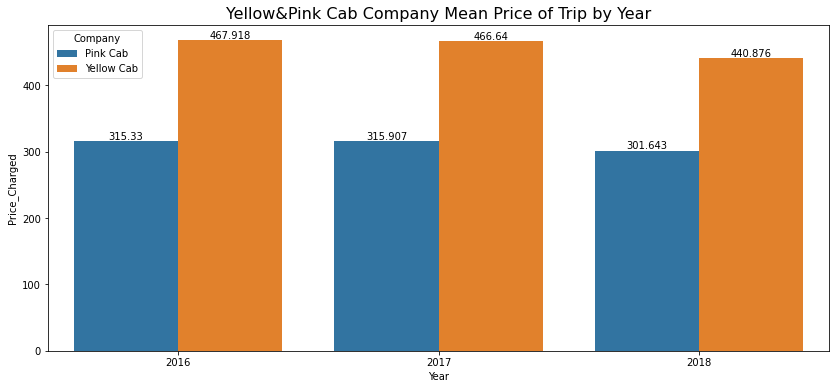

In [64]:
mean_price = transactions.groupby(['Year', 'Company'])['Price_Charged'].mean().reset_index()
# profit_distr.rename(columns={"Transaction_ID": "Number_of_trips"}, inplace=True)

dims = (14, 6)
fig, ax = plt.subplots(figsize= dims)

g = sns.barplot(x="Year", y="Price_Charged", hue="Company", ax=ax, data=mean_price)
for i in g.containers:
    g.bar_label(i,)
plt.title('Yellow&Pink Cab Company Mean Price of Trip by Year', fontsize=16)
plt.show()

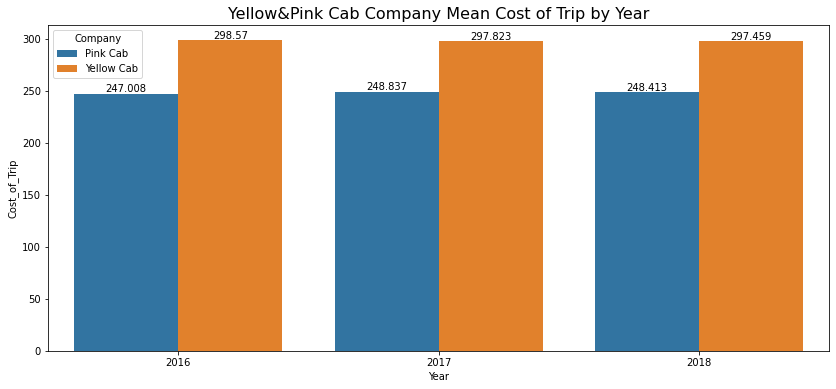

In [65]:
mean_cost = transactions.groupby(['Year', 'Company'])['Cost_of_Trip'].mean().reset_index()
# profit_distr.rename(columns={"Transaction_ID": "Number_of_trips"}, inplace=True)

dims = (14, 6)
fig, ax = plt.subplots(figsize= dims)

g = sns.barplot(x="Year", y="Cost_of_Trip", hue="Company", ax=ax, data=mean_cost)
for i in g.containers:
    g.bar_label(i,)
plt.title('Yellow&Pink Cab Company Mean Cost of Trip by Year', fontsize=16)
plt.show()

The difference in average costs between 2 companies is about 20%, but the difference in price is about 48%.

### Gender & Income analysis

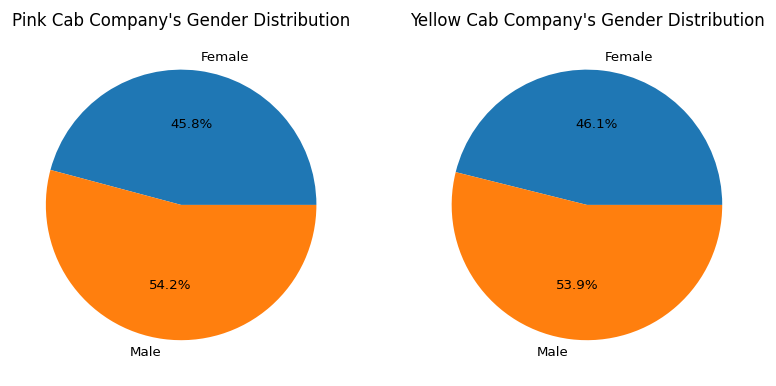

In [66]:


gender_p = transactions[transactions.Company=='Pink Cab'].groupby('Gender')['Customer_ID'].nunique()
gender_y = transactions[transactions.Company=='Yellow Cab'].groupby('Gender')['Customer_ID'].nunique()

fig = plt.figure(figsize=(8,4),dpi=120)


ax1 = fig.add_subplot(121)
labels1 = gender_p.keys()
textprops = {"fontsize":8}
ax1.pie(x=gender_p, autopct="%.1f%%", labels=list(labels1), textprops=textprops)

plt.title("Pink Cab Company's Gender Distribution", fontsize=10)
# pie.savefig("Total_trips.png")


ax2 = fig.add_subplot(122)
labels2 = gender_y.keys()
ax2.pie(x=gender_y, autopct="%.1f%%", labels=list(labels2), textprops=textprops)
plt.title("Yellow Cab Company's Gender Distribution", fontsize=10)
# pie.savefig("Total_trips.png")
plt.show()

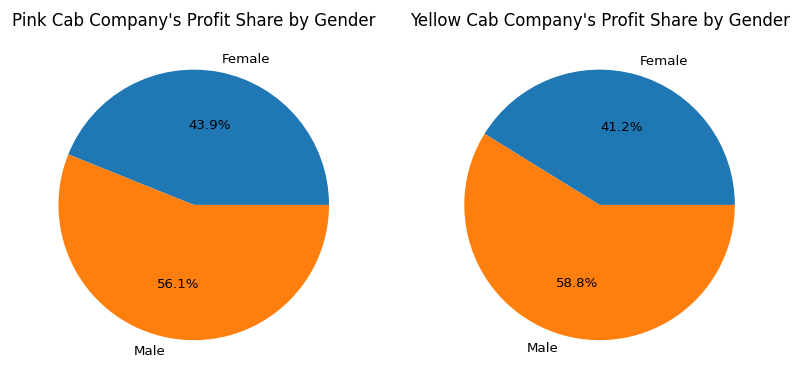

In [67]:
gender_profit_p = transactions[transactions.Company=='Pink Cab'].groupby('Gender')['Profit'].sum()
gender_profit_y = transactions[transactions.Company=='Yellow Cab'].groupby('Gender')['Profit'].sum()

fig = plt.figure(figsize=(8,4),dpi=120)


ax1 = fig.add_subplot(121)
labels1 = gender_profit_p.keys()
textprops = {"fontsize":8}
ax1.pie(x=gender_profit_p, autopct="%.1f%%", labels=list(labels1), textprops=textprops)

plt.title("Pink Cab Company's Profit Share by Gender", fontsize=10)
# pie.savefig("Total_trips.png")


ax2 = fig.add_subplot(122)
labels2 = gender_profit_y.keys()
ax2.pie(x=gender_profit_y, autopct="%.1f%%", labels=list(labels2), textprops=textprops)
plt.title("Yellow Cab Company's Profit Share by Gender", fontsize=10)
# pie.savefig("Total_trips.png")
plt.show()

Profit distribution by gender is almost equal gender distribution. 

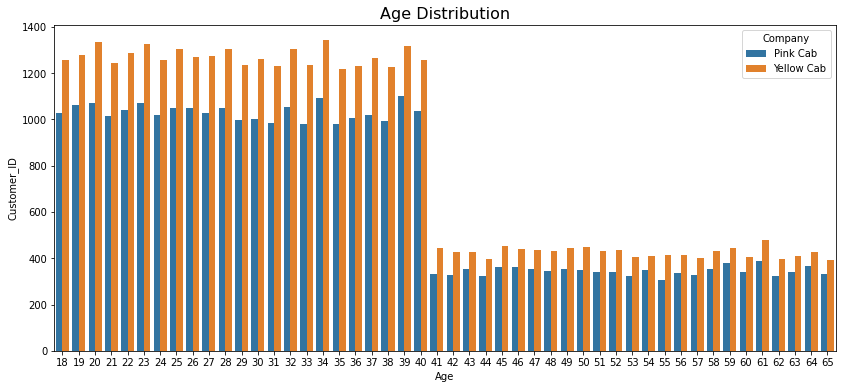

In [68]:
age_distr = transactions.groupby(['Age', 'Company'])['Customer_ID'].nunique().reset_index()
# profit_distr.rename(columns={"Transaction_ID": "Number_of_trips"}, inplace=True)

dims = (14, 6)
fig, ax = plt.subplots(figsize= dims)

g = sns.barplot(x="Age", y="Customer_ID", hue="Company", ax=ax, data=age_distr, estimator= np.sum)
plt.title('Age Distribution', fontsize=16)
plt.show()

In [84]:
def func_ages_group(x):
    if x >= 18 and x <= 25:
        return "18-25"
    elif x >= 26 and x <= 40:
        return "26-40"
    else:
        return "41-65"


transactions['Age_group'] = transactions['Age'].apply(func_ages_group)

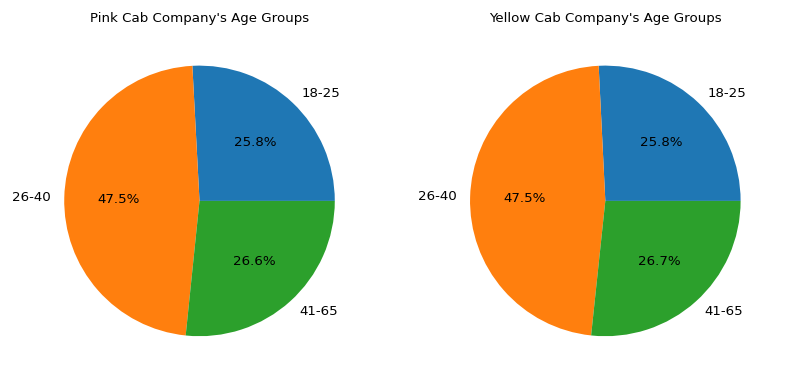

In [83]:
gender_p = transactions[transactions.Company=='Pink Cab'].groupby('Age_group')['Customer_ID'].nunique()
gender_y = transactions[transactions.Company=='Yellow Cab'].groupby('Age_group')['Customer_ID'].nunique()

fig = plt.figure(figsize=(8,4),dpi=120)


ax1 = fig.add_subplot(121)
labels1 = gender_p.keys()
textprops = {"fontsize":8}
ax1.pie(x=gender_p, autopct="%.1f%%", labels=list(labels1), textprops=textprops)

plt.title("Pink Cab Company's Age Groups", fontsize=8)
# pie.savefig("Total_trips.png")


ax2 = fig.add_subplot(122)
labels2 = gender_y.keys()
ax2.pie(x=gender_y, autopct="%.1f%%", labels=list(labels2), textprops=textprops)
plt.title("Yellow Cab Company's Age Groups", fontsize=8)
# pie.savefig("Total_trips.png")
plt.show()

the number of clients has been increasing for more than 40 years and is sharply decreasing

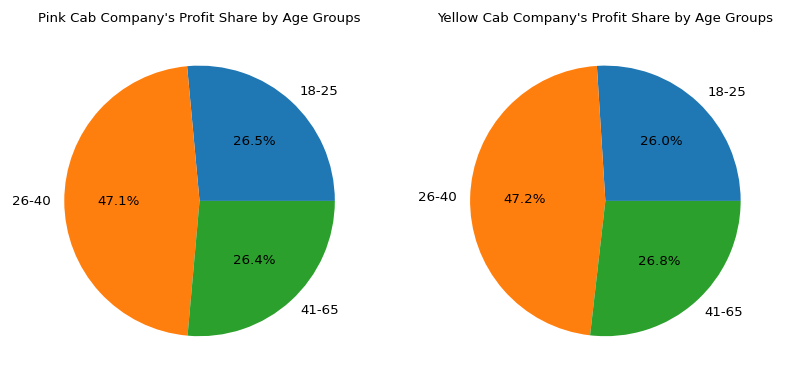

In [85]:
gender_profit_p = transactions[transactions.Company=='Pink Cab'].groupby('Age_group')['Profit'].sum()
gender_profit_y = transactions[transactions.Company=='Yellow Cab'].groupby('Age_group')['Profit'].sum()

fig = plt.figure(figsize=(8,4),dpi=120)


ax1 = fig.add_subplot(121)
labels1 = gender_profit_p.keys()
textprops = {"fontsize":8}
ax1.pie(x=gender_profit_p, autopct="%.1f%%", labels=list(labels1), textprops=textprops)

plt.title("Pink Cab Company's Profit Share by Age Groups", fontsize=8)
# pie.savefig("Total_trips.png")


ax2 = fig.add_subplot(122)
labels2 = gender_profit_y.keys()
ax2.pie(x=gender_profit_y, autopct="%.1f%%", labels=list(labels2), textprops=textprops)
plt.title("Yellow Cab Company's Profit Share by Age Groups", fontsize=8)
# pie.savefig("Total_trips.png")
plt.show()

In both companies 73% of clients 18-40 years generate 73% profit

<AxesSubplot:>

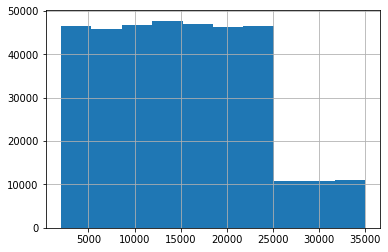

In [71]:
transactions['Income_(USD/Month)'].hist()

In [72]:
def func_income_group(x):
    if x >= 2000 and x <= 3000:
        return "< 3000"
    elif x >= 3001 and x <= 10000:
        return "3000-15000"
    else:
        return ">15000"


transactions['Income_group'] = transactions['Income_(USD/Month)'].apply(func_income_group)

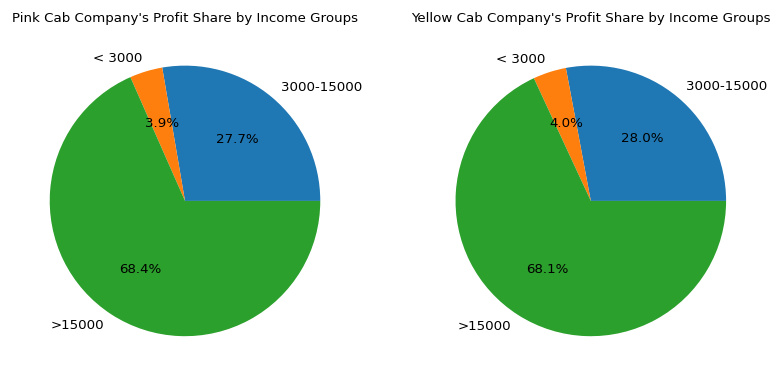

In [73]:
income_profit_p = transactions[transactions.Company=='Pink Cab'].groupby('Income_group')['Customer_ID'].nunique()
income_profit_y = transactions[transactions.Company=='Yellow Cab'].groupby('Income_group')['Customer_ID'].nunique()

fig = plt.figure(figsize=(8,4),dpi=120)


ax1 = fig.add_subplot(121)
labels1 = income_profit_p.keys()
textprops = {"fontsize":8}
ax1.pie(x=income_profit_p, autopct="%.1f%%", labels=list(labels1), textprops=textprops)

plt.title("Pink Cab Company's Profit Share by Income Groups", fontsize=8)
# pie.savefig("Total_trips.png")


ax2 = fig.add_subplot(122)
labels2 = income_profit_y.keys()
ax2.pie(x=income_profit_y, autopct="%.1f%%", labels=list(labels2), textprops=textprops)
plt.title("Yellow Cab Company's Profit Share by Income Groups", fontsize=8)
# pie.savefig("Total_trips.png")
plt.show()

68% of Profit generate clients with income more than 15000$/month

In [74]:
transactions[['Age', 'Income_(USD/Month)']].corr()

,Age,Income_(USD/Month)
Age,1.000000,0.003907
Income_(USD/Month),0.003907,1.000000


### Retention analysis

In [75]:
retention = transactions.groupby(['Customer_ID', 'Company'])['Transaction_ID'].count().reset_index()
retention.rename(columns={"Transaction_ID": "Number_of_trips"}, inplace=True)
ret_graf = retention.groupby(['Number_of_trips', 'Company']).count().reset_index()
ret_graf.rename(columns={"Customer_ID": "Number_of_clients"}, inplace=True)

In [76]:
def func_retention_group(x):
    if x < 5:
        return "<5"
    elif x >= 5 and x <= 15:
        return "5-15"
    elif x >= 16 and x <= 25:
        return "16-25"
    else:
        return ">26"


ret_graf['Retention_group'] = ret_graf['Number_of_trips'].apply(func_retention_group)

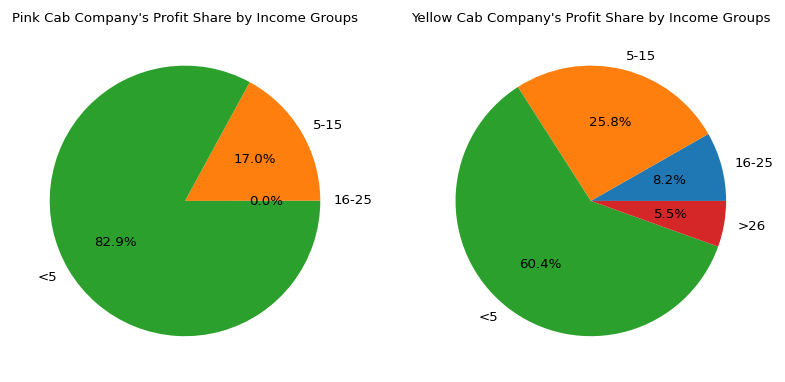

In [77]:
retention_p = ret_graf[ret_graf.Company=='Pink Cab'].groupby('Retention_group')['Number_of_clients'].sum()
retention_y = ret_graf[ret_graf.Company=='Yellow Cab'].groupby('Retention_group')['Number_of_clients'].sum()

fig = plt.figure(figsize=(8,4),dpi=120)


ax1 = fig.add_subplot(121)
labels1 = retention_p.keys()
textprops = {"fontsize":8}
ax1.pie(x=retention_p, autopct="%.1f%%", labels=list(labels1), textprops=textprops)

plt.title("Pink Cab Company's Profit Share by Income Groups", fontsize=8)
# pie.savefig("Total_trips.png")


ax2 = fig.add_subplot(122)
labels2 = retention_y.keys()
ax2.pie(x=retention_y, autopct="%.1f%%", labels=list(labels2), textprops=textprops)
plt.title("Yellow Cab Company's Profit Share by Income Groups", fontsize=8)
# pie.savefig("Total_trips.png")
plt.show()

Yellow Cab has 40% regular customer, Pink Cab only 17%

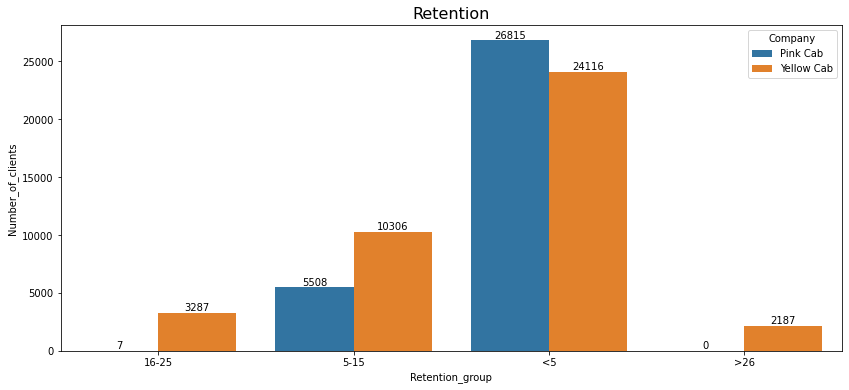

In [78]:
retention_total = ret_graf.groupby(['Retention_group', 'Company'])['Number_of_clients'].sum().reset_index()
dims = (14, 6)
fig, ax = plt.subplots(figsize= dims)

g = sns.barplot(x="Retention_group", y="Number_of_clients", hue="Company", ax=ax, data=retention_total)
# g = sns.countplot(x="Retention_group", hue="Company", data=ret_graf, ax=ax)
plt.title('Retention', fontsize=16)
for i in g.containers:
    g.bar_label(i,)
plt.show()

**The number of clients of both companies is not much different, but due to the fact that people always return to the Yellow Cab Company , despite the higher price, the Yellow Cab Company has a bigger profit and more trips.**

##Recomendations:

* with a 10% difference in the number of customers, the difference in the number of trips between the Yellow and Pink Cab companies is almost 3 times.

* Pink Cab company has 13% of trips at a loss. Yellow Cab company - 5%.

* Yellow Cab Company has a Profit in 2.2-2.4 times bigger than Pink Cab Company

* the number of cities where Yellow Cab has an advatage in trips more, than Pink Company (15 and 4 accordingly).

* Yellow Cab Company has 40% regular clients, 13.7% clients have more than 15 trips each. Pink Cab only 17% regular clients with 5-15 trips each.


**Based on the analysis, we recommend the YELLOW CAB company for investment**